In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import trim_mean

In [97]:
# Loading data
df1 = pd.read_csv('D:/Second semester/Intro to AI/project/archive/ancona_data.csv')
df2 = pd.read_csv('D:/Second semester/Intro to AI/project/archive/athens_data.csv')

# seeing sample of data
print(df1.head())
print(df2.head())

                  Date        NO2         O3       PM10     PM2.5   Latitude  \
0  2021-09-01 01:00:00   7.000000  53.000000  15.000000  4.000000  43.612386   
1  2021-09-01 01:00:00   8.000000        NaN   9.000000       NaN  43.527982   
2  2021-09-01 01:00:00   9.035176  49.232338  10.681684  7.700312  43.450000   
3  2021-09-01 01:00:00  10.292098  51.336113  10.310384  6.732396  43.550000   
4  2021-09-01 01:00:00   8.348963  39.351303  10.273862  7.066792  43.550000   

   Longitude            station_name  Wind-Speed (U)  Wind-Speed (V)  \
0  13.510830        Ancona Citadella       -0.528286       -0.987673   
1  13.246672                    Jesi       -0.529657       -0.987282   
2  13.250000  Ancona CAMS Station 11       -0.529798       -0.987225   
3  13.450000   Ancona CAMS Station 8       -0.528619       -0.987565   
4  13.150000   Ancona CAMS Station 5       -0.530069       -0.987179   

   Dewpoint Temp  Soil Temp  Total Percipitation  Vegitation (High)  \
0      63.56378

In [98]:
columns_ord = df1.columns

# Re-ordering the columns of 2nd dataframe as 1st dataframe
df2 = df2[columns_ord]

In [99]:
df1.info()
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 417626 entries, 0 to 417625
Data columns (total 19 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Date                 417626 non-null  object 
 1   NO2                  409848 non-null  float64
 2   O3                   392823 non-null  float64
 3   PM10                 389767 non-null  float64
 4   PM2.5                372508 non-null  float64
 5   Latitude             417626 non-null  float64
 6   Longitude            417626 non-null  float64
 7   station_name         417626 non-null  object 
 8   Wind-Speed (U)       417626 non-null  float64
 9   Wind-Speed (V)       417626 non-null  float64
 10  Dewpoint Temp        417626 non-null  float64
 11  Soil Temp            417626 non-null  float64
 12  Total Percipitation  417626 non-null  float64
 13  Vegitation (High)    417626 non-null  float64
 14  Vegitation (Low)     417626 non-null  float64
 15  Temp             

In [100]:
# dropping unnecessary columns
df1 = df1.drop(columns=['id', 'code'])

df2 = df2.drop(columns=['id', 'code'])

In [101]:
df1.head()

,Date,NO2,O3,PM10,PM2.5,Latitude,Longitude,station_name,Wind-Speed (U),Wind-Speed (V),Dewpoint Temp,Soil Temp,Total Percipitation,Vegitation (High),Vegitation (Low),Temp,Relative Humidity
0,2021-09-01 01:00:00,7.000000,53.000000,15.000000,4.000000,43.612386,13.510830,Ancona Citadella,-0.528286,-0.987673,63.563788,66.476667,0.0,3.184390,2.847654,66.075624,85.422435
1,2021-09-01 01:00:00,8.000000,NaN,9.000000,NaN,43.527982,13.246672,Jesi,-0.529657,-0.987282,64.894507,67.803820,0.0,3.179204,2.851910,67.392994,85.502078
2,2021-09-01 01:00:00,9.035176,49.232338,10.681684,7.700312,43.450000,13.250000,Ancona CAMS Station 11,-0.529798,-0.987225,65.123477,68.032686,0.0,3.176792,2.852830,67.622493,85.500013
3,2021-09-01 01:00:00,10.292098,51.336113,10.310384,6.732396,43.550000,13.450000,Ancona CAMS Station 8,-0.528619,-0.987565,63.943511,66.855648,0.0,3.181947,2.849007,66.453195,85.435906
4,2021-09-01 01:00:00,8.348963,39.351303,10.273862,7.066792,43.550000,13.150000,Ancona CAMS Station 5,-0.530069,-0.987179,65.208544,68.116622,0.0,3.179280,2.852743,67.701531,85.534001


In [102]:
df2.head()

,Date,NO2,O3,PM10,PM2.5,Latitude,Longitude,station_name,Wind-Speed (U),Wind-Speed (V),Dewpoint Temp,Soil Temp,Total Percipitation,Vegitation (High),Vegitation (Low),Temp,Relative Humidity
0,2020-05-01 00:00:00,3.479941,76.28401,8.101824,6.200135,38.15,23.55,Athens CAMS station 0,1.713115,-0.588855,10.046454,17.083554,0.000035,1.699026,2.244626,12.948856,82.578812
1,2020-05-01 00:00:00,17.563843,74.39110,10.520411,7.836725,37.85,23.75,Athens CAMS station 9,1.960498,-0.937417,10.270286,17.909675,0.000037,1.743299,1.431182,14.011539,78.352731
2,2020-05-01 00:00:00,2.892315,74.56569,8.587352,6.306404,38.15,23.65,Athens CAMS station 1,1.640985,-0.556073,9.700422,16.976489,0.000040,1.642665,2.172998,12.550690,82.840317
3,2020-05-01 00:00:00,17.196804,67.90412,10.917974,8.207660,37.85,23.85,Athens CAMS station 10,2.003834,-0.971722,10.159251,17.993456,0.000036,1.753648,1.582832,14.261641,76.558915
4,2020-05-01 00:00:00,15.817172,67.63471,11.353168,8.217451,37.85,23.95,Athens CAMS station 11,1.954063,-0.912335,9.993532,17.957935,0.000036,1.706804,1.806660,14.179075,76.140202


In [106]:
df1.isnull().sum().sort_values(ascending=True)

Date                       0
Vegitation (Low)           0
Vegitation (High)          0
Total Percipitation        0
Soil Temp                  0
Dewpoint Temp              0
Wind-Speed (V)             0
Temp                       0
Wind-Speed (U)             0
Longitude                  0
Latitude                   0
station_name               0
Relative Humidity          0
NO2                     7778
O3                     24803
PM10                   27859
PM2.5                  45118
dtype: int64

In [107]:
df1.describe()

,NO2,O3,PM10,PM2.5,Latitude,Longitude,Wind-Speed (U),Wind-Speed (V),Dewpoint Temp,Soil Temp,Total Percipitation,Vegitation (High),Vegitation (Low),Temp,Relative Humidity
count,409848.000000,392823.000000,389767.000000,372508.000000,417626.000000,417626.000000,417626.000000,417626.000000,417626.000000,417626.000000,4.176260e+05,417626.000000,417626.000000,417626.000000,417626.000000
mean,12.827087,56.985822,18.901080,13.029915,43.567772,13.363402,-0.112081,-0.203619,50.186664,55.321276,1.644118e-03,3.059505,2.777506,55.232497,75.301643
std,9.463539,25.881841,10.480908,7.852031,0.074816,0.127325,0.889874,0.956847,17.823638,18.173232,4.932701e-03,0.248034,0.147349,18.209059,18.553947
min,0.000000,0.000000,0.000000,0.000000,43.450000,13.150000,-3.877032,-3.671453,8.371775,12.047776,-6.940000e-18,2.718726,2.573985,10.109338,12.943158
25%,6.426122,38.156440,11.937048,7.866542,43.527982,13.250000,-0.735605,-0.996508,48.866307,52.033239,2.305655e-07,2.810968,2.628907,52.015683,62.288855
50%,10.320171,56.561120,16.547325,11.193825,43.574761,13.361060,-0.368986,-0.360379,56.987120,59.744633,1.271375e-05,3.057545,2.776209,60.127705,79.907559
75%,16.195905,74.819915,23.530932,16.167352,43.637500,13.450000,0.456399,0.529858,62.168484,66.947640,6.119069e-04,3.271532,2.902817,66.983502,90.889160
max,285.000000,162.000000,249.000000,200.000000,43.650000,13.550000,3.617407,4.307326,72.999793,90.073126,7.496383e-02,3.470822,3.022056,88.419472,99.996023


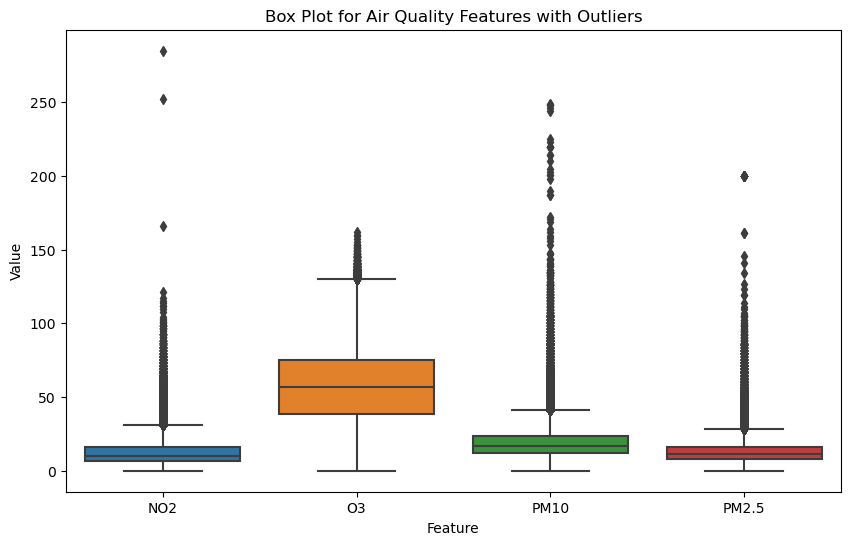

In [109]:
# Melt the DataFrame to long format
df_melted = df1.melt(id_vars=['Date', 'Latitude', 'Longitude', 'station_name', 'Wind-Speed (U)', 'Wind-Speed (V)', 'Dewpoint Temp', 'Soil Temp', 'Total Percipitation', 'Vegitation (High)', 'Vegitation (Low)', 'Temp', 'Relative Humidity'], 
                     value_vars=['NO2', 'O3', 'PM10', 'PM2.5'], 
                     var_name='Feature', 
                     value_name='Value')

# Create a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Feature', y='Value', data=df_melted, showfliers=True)
plt.title('Box Plot for Air Quality Features with Outliers')
plt.xlabel('Feature')
plt.ylabel('Value')

plt.show()

In [110]:
# calculating upper and lower fence of df1
def uf_lf(features):
    dic = {}
    for i in features: 
        # calculating quartiles
        q25,q75 = df1[i].quantile([0.25,0.75])

        # calculating Interquartile range
        IQR = q75 - q25

        # calculating lower and upper fence
        lf = q25 - 1.5*IQR
        uf = q75 + 1.5*IQR
        
        dic[i + '_lf']= lf
        dic[i + '_uf']= uf
    return dic

feat = ['NO2','O3','PM10','PM2.5']
uf_lf = uf_lf(feat)
print(uf_lf)

{'NO2_lf': -8.228553625, 'NO2_uf': 30.850580575, 'O3_lf': -16.838772500000005, 'O3_uf': 129.81512750000002, 'PM10_lf': -5.4537799999999965, 'PM10_uf': 40.92175999999999, 'PM2.5_lf': -4.584673812499999, 'PM2.5_uf': 28.618567087499997}


In [111]:
# checking uf outliers in NO2
NO2_outliers = df1['NO2'][uf_lf['NO2_uf']<df1['NO2']].count() + df1['NO2'][uf_lf['NO2_lf']>df1['NO2']].count()
print('NO2 outliers:', NO2_outliers)

# checking uf outliers in O3
O3_outliers = df1['O3'][uf_lf['O3_uf']<df1['O3']].count() + df1['O3'][uf_lf['O3_lf']>df1['O3']].count()
#print('\nO3 outliers count:', O3_outliers.count())
print('O3 outliers:', O3_outliers)

# checking uf outliers in PM2.5
PM2_5_outliers = df1['PM2.5'][uf_lf['PM2.5_uf']<df1['PM2.5']].count() + df1['PM2.5'][uf_lf['PM2.5_lf']>df1['PM2.5']].count()
#print('\nPM2.5 outliers count:', PM2_5_outliers.count())
print('PM2.5 outliers:',PM2_5_outliers)

# checking uf outliers in PM2.5
PM10_outliers = df1['PM10'][uf_lf['PM10_uf']<df1['PM10']].count() + df1['PM10'][uf_lf['PM10_lf'] > df1['PM10']].count()
#print('\nPM10utliers count:', PM10_outliers.count())
print('PM10 outliers:',PM10_outliers)

NO2 outliers: 22475
O3 outliers: 436
PM2.5 outliers: 15943
PM10 outliers: 14487


In [112]:
# Filling missing values in NO2(using median as data had outliers)
df1['NO2'].fillna(df1['NO2'].median(), inplace=True)

# Filling missing values in O3(using mean as data have very less outliers)
df1['O3'].fillna(df1['O3'].mean(), inplace=True)

# Filling missing values in PM2.5(using median as data had outliers)
df1['PM2.5'].fillna(df1['PM2.5'].median(), inplace=True)

# Filling missing values in PM10(using median as data had outliers)
df1['PM10'].fillna(df1['PM10'].median(), inplace=True)

In [113]:
df1.isnull().sum().sort_values(ascending=True)

Date                   0
Vegitation (Low)       0
Vegitation (High)      0
Total Percipitation    0
Soil Temp              0
Dewpoint Temp          0
Wind-Speed (V)         0
Temp                   0
Wind-Speed (U)         0
Longitude              0
Latitude               0
PM2.5                  0
PM10                   0
O3                     0
NO2                    0
station_name           0
Relative Humidity      0
dtype: int64

In [114]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1726464 entries, 0 to 1726463
Data columns (total 17 columns):
 #   Column               Dtype  
---  ------               -----  
 0   Date                 object 
 1   NO2                  float64
 2   O3                   float64
 3   PM10                 float64
 4   PM2.5                float64
 5   Latitude             float64
 6   Longitude            float64
 7   station_name         object 
 8   Wind-Speed (U)       float64
 9   Wind-Speed (V)       float64
 10  Dewpoint Temp        float64
 11  Soil Temp            float64
 12  Total Percipitation  float64
 13  Vegitation (High)    float64
 14  Vegitation (Low)     float64
 15  Temp                 float64
 16  Relative Humidity    float64
dtypes: float64(15), object(2)
memory usage: 223.9+ MB


In [115]:
# checking Null values in dataframe 2
df2.isnull().sum().sort_values(ascending=True)

Date                        0
PM10                        0
PM2.5                       0
Latitude                    0
Longitude                   0
station_name                0
Temp                     7565
Vegitation (Low)         8573
Vegitation (High)        8573
Total Percipitation      8573
Soil Temp                8573
Wind-Speed (U)           8573
Wind-Speed (V)           8573
Dewpoint Temp            8573
Relative Humidity        8573
NO2                    143293
O3                     148064
dtype: int64

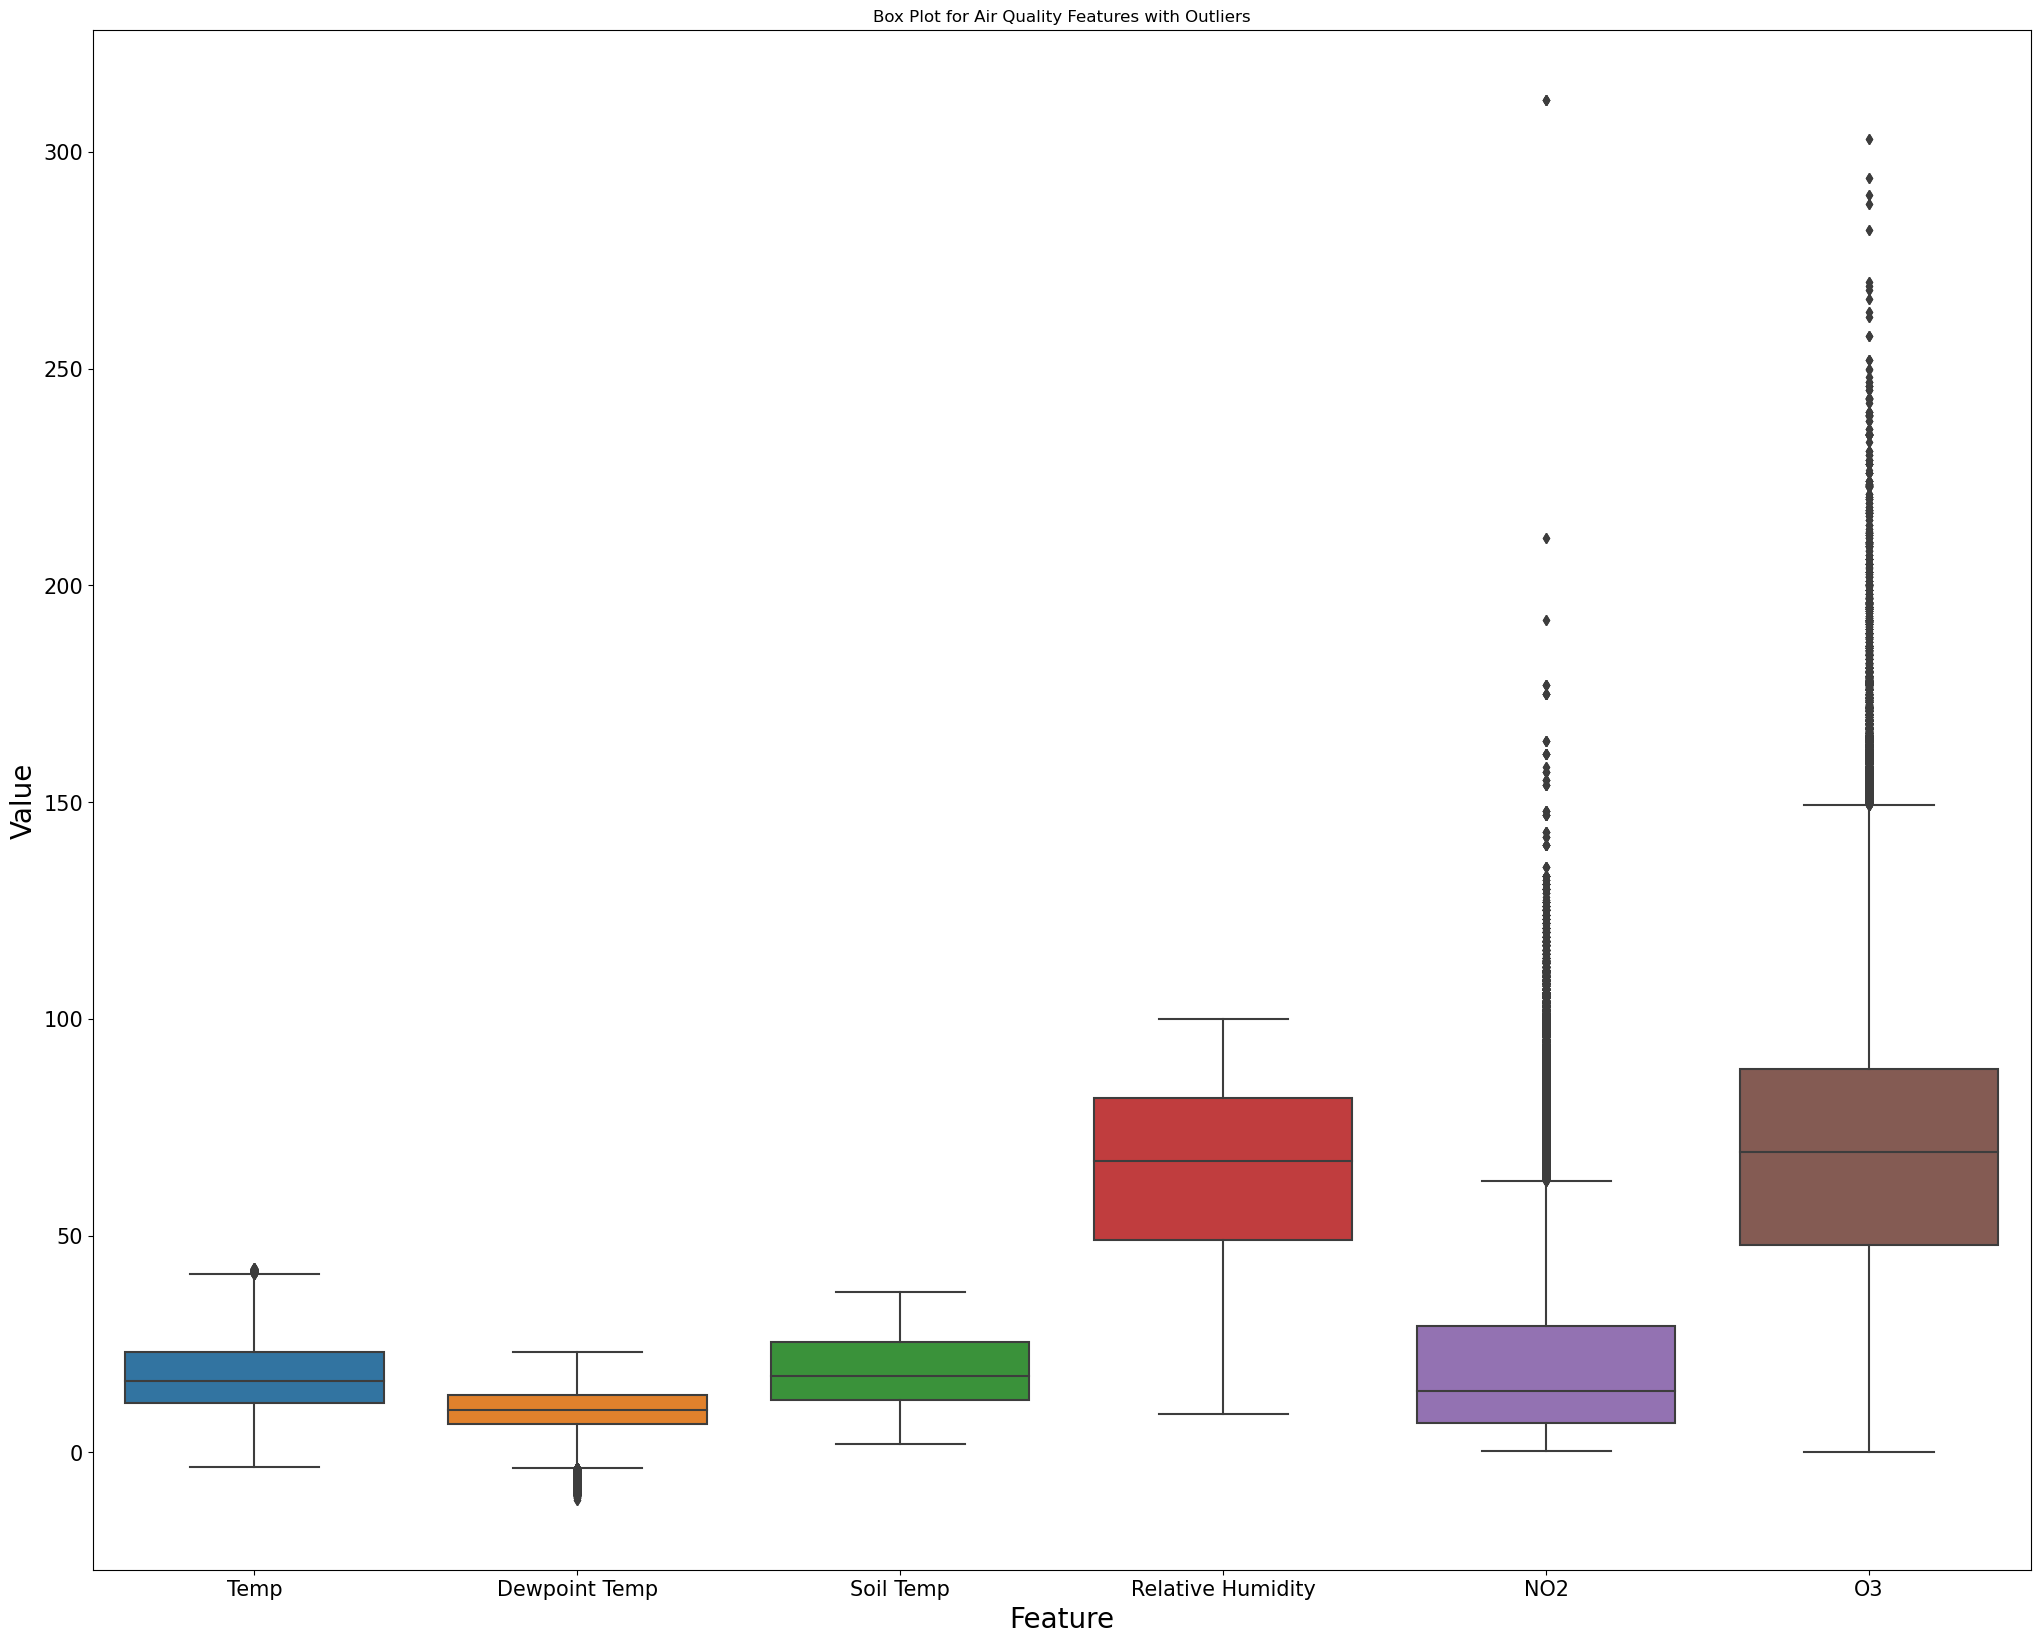

In [116]:
# Melt the DataFrame to long format
df_melted = df2.melt(id_vars=['Date', 'Latitude', 'Longitude', 'station_name'], 
                     value_vars=['Temp', 'Dewpoint Temp', 'Soil Temp', 'Relative Humidity', 'NO2', 'O3'], 
                     var_name='Feature', 
                     value_name='Value')

# Create a box plot
plt.figure(figsize=(25, 20))
sns.boxplot(x='Feature', y='Value', data=df_melted, showfliers=True)
plt.title('Box Plot for Air Quality Features with Outliers')
plt.xlabel('Feature', size = 20)
plt.ylabel('Value', size = 20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.show()

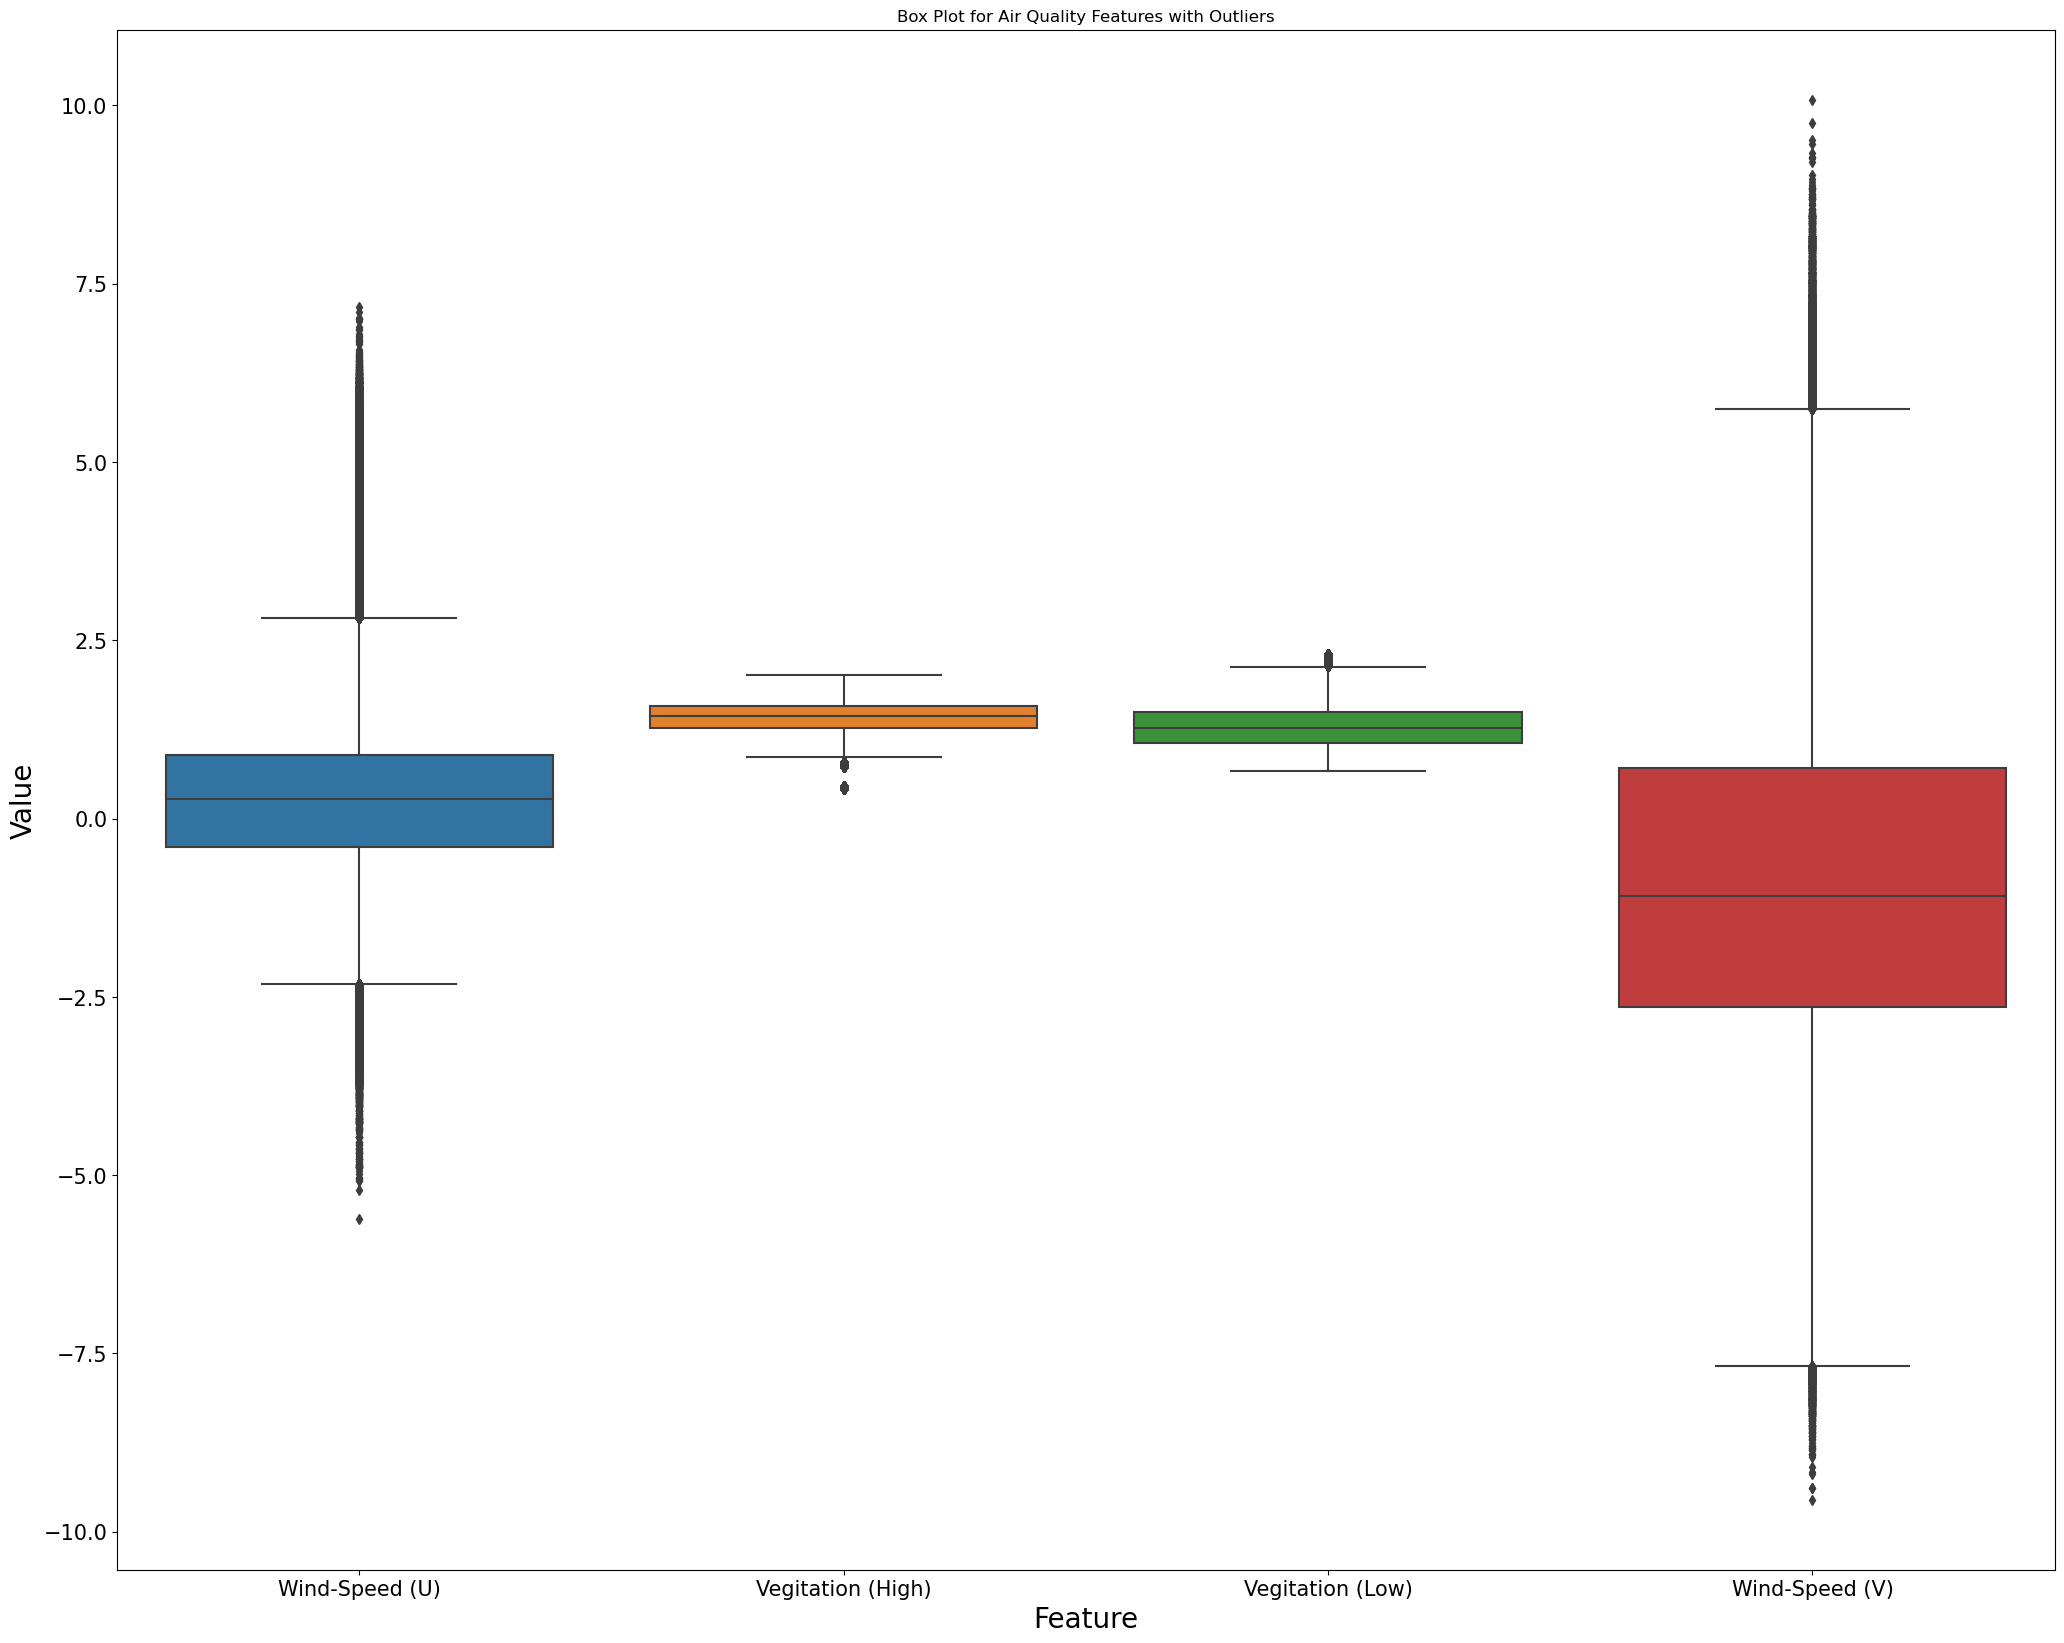

In [118]:
# Melt the DataFrame to long format
df_melted = df2.melt(id_vars=['Date', 'Latitude', 'Longitude', 'station_name'], 
                     value_vars=['Wind-Speed (U)', 'Vegitation (High)', 'Vegitation (Low)', 'Wind-Speed (V)'], 
                     var_name='Feature', 
                     value_name='Value')

# Create a box plot
plt.figure(figsize=(25, 20))
sns.boxplot(x='Feature', y='Value', data=df_melted, showfliers=True)
plt.title('Box Plot for Air Quality Features with Outliers')
plt.xlabel('Feature', size = 20)
plt.ylabel('Value', size = 20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.show()

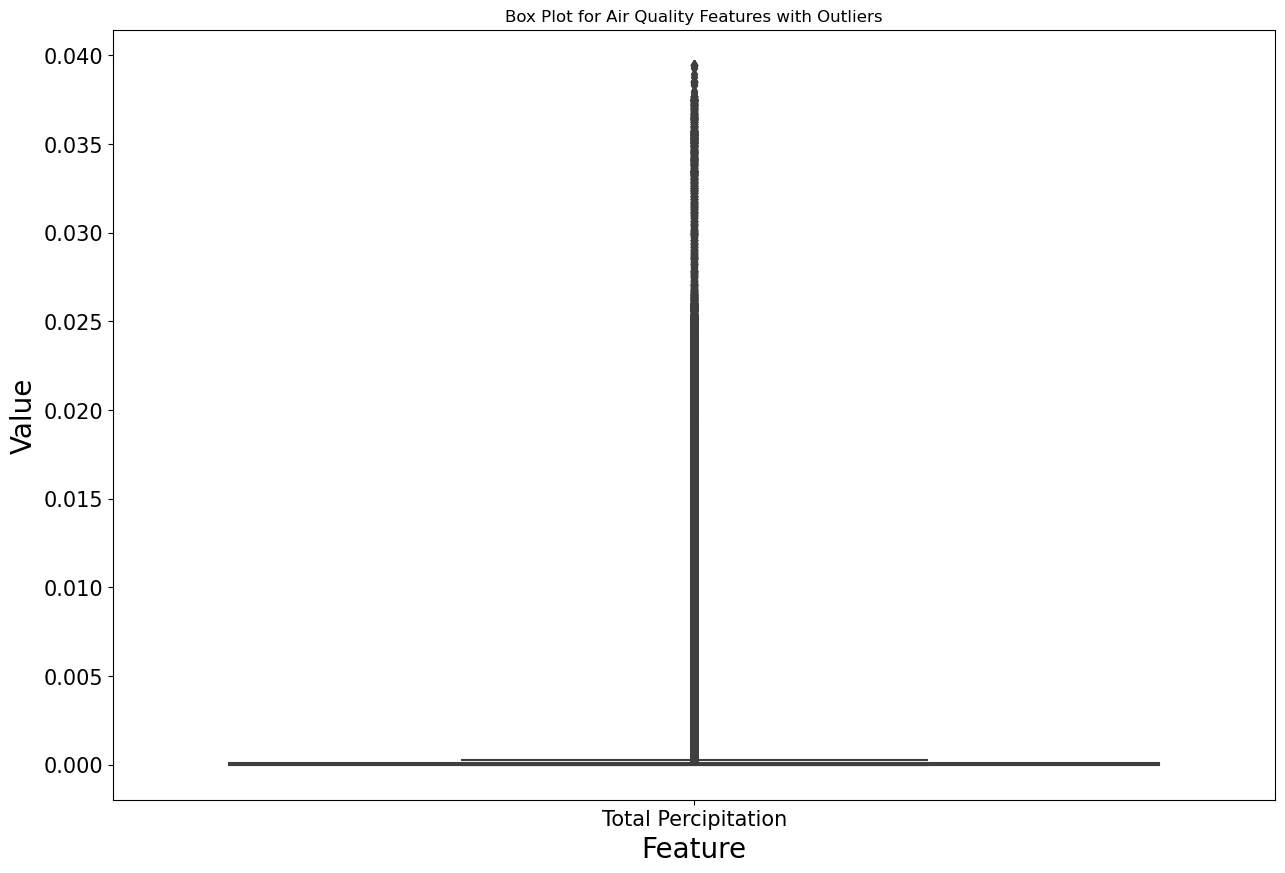

In [121]:

# Melt the DataFrame to long format
df_melted = df2.melt(value_vars=['Total Percipitation'], 
                     var_name='Feature', 
                     value_name='Value')

# Create a box plot
plt.figure(figsize=(15, 10))
sns.boxplot(x='Feature', y='Value', data=df_melted, showfliers=True)
plt.title('Box Plot for Air Quality Features with Outliers')
plt.xlabel('Feature', size = 20)
plt.ylabel('Value', size = 20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.show()

In [122]:
# calculating upper and lower fence of df2
def uf_lf(features):
    dic = {}
    for i in features: 
        # calculating quartiles
        q25,q75 = df2[i].quantile([0.25,0.75])

        # calculating Interquartile range
        IQR = q75 - q25

        # calculating lower and upper fence
        lf = q25 - 1.5*IQR
        uf = q75 + 1.5*IQR
        
        dic[i + '_lf']= lf
        dic[i + '_uf']= uf
    return dic

feat2 = ['Temp', 'Wind-Speed (U)', 'Dewpoint Temp', 'Soil Temp', 'Vegitation (High)', 'Vegitation (Low)', 'Total Percipitation', 'Relative Humidity', 'Wind-Speed (V)', 'NO2', 'O3' ]

uf_lf = uf_lf(feat2)
print(uf_lf)

{'Temp_lf': -6.641272948293743, 'Temp_uf': 41.2055771531907, 'Wind-Speed (U)_lf': -2.322366070602256, 'Wind-Speed (U)_uf': 2.8154410781414514, 'Dewpoint Temp_lf': -3.616227659413182, 'Dewpoint Temp_uf': 23.23514587282566, 'Soil Temp_lf': -7.938145216171284, 'Soil Temp_uf': 45.488822571957996, 'Vegitation (High)_lf': 0.8104255513226845, 'Vegitation (High)_uf': 2.031903972035573, 'Vegitation (Low)_lf': 0.40455941016092556, 'Vegitation (Low)_uf': 2.139259540018215, 'Total Percipitation_lf': -0.00017328353057054782, 'Total Percipitation_uf': 0.0002888058842842487, 'Relative Humidity_lf': -0.3407896478074264, 'Relative Humidity_uf': 131.10032912160813, 'Wind-Speed (V)_lf': -7.674226775213407, 'Wind-Speed (V)_uf': 5.738587657962032, 'NO2_lf': -26.708869500000006, 'NO2_uf': 62.713406500000005, 'O3_lf': -12.937615625000014, 'O3_uf': 149.35507137500002}


In [123]:
def calculate_outliers(df2, uf_lf, features):
    for feature in features:
        outliers = df2[feature][uf_lf[f'{feature}_uf'] < df2[feature]].count() + df2[feature][uf_lf[f'{feature}_lf'] > df2[feature]].count()
        print(f'\n{feature} outliers count:', outliers)
        

# Example usage:
features = ['Temp', 'Wind-Speed (U)', 'Dewpoint Temp', 'Soil Temp', 'Vegitation (High)', 'Vegitation (Low)', 'Total Percipitation', 'Relative Humidity', 'Wind-Speed (V)', 'NO2', 'O3']
calculate_outliers(df2, uf_lf, features)


Temp outliers count: 239

Wind-Speed (U) outliers count: 60726

Dewpoint Temp outliers count: 17548

Soil Temp outliers count: 0

Vegitation (High) outliers count: 53827

Vegitation (Low) outliers count: 107565

Total Percipitation outliers count: 320900

Relative Humidity outliers count: 0

Wind-Speed (V) outliers count: 8379

NO2 outliers count: 63600

O3 outliers count: 5163


In [124]:
# filling nan values with mean for fetaures with no or equal to no outliers
def fill_na(features):
    for feat in features:
        df2[feat].fillna(df2[feat].mean(), inplace=True)

features = ['Temp', 'Soil Temp', 'Relative Humidity', 'Dewpoint Temp', 'Wind-Speed (V)', 'O3' ]
fill_na(features)

# Filling missing values in Wind Speed (U)(using trim mean as data had outliers)
trim_mean_Wind = trim_mean(df2['Wind-Speed (U)'], proportiontocut=0.05)
df2['Wind-Speed (U)'].fillna(trim_mean_Wind, inplace=True)

# Filling missing values in Total Preception(using trim mean as data had outliers)
trim_mean_Preception = trim_mean(df2['Total Percipitation'], proportiontocut=0.2)
df2['Total Percipitation'].fillna(trim_mean_Preception, inplace=True)

# Filling missing values in NO2(using trim mean as data had outliers)
trim_mean_NO2 = trim_mean(df2['NO2'], proportiontocut=0.1)
df2['NO2'].fillna(trim_mean_NO2, inplace=True)

# Filling missing values in 'Vegitation (Low)'(using trim mean as data had outliers)
trim_mean_vegetation_low = trim_mean(df2['Vegitation (Low)'], proportiontocut=0.1)
df2['Vegitation (Low)'].fillna(trim_mean_vegetation_low, inplace=True)

# Filling missing values in 'Vegitation (High)'(using trim mean as data had outliers)
trim_mean_vegetation_High = trim_mean(df2['Vegitation (High)'], proportiontocut=0.05)
df2['Vegitation (High)'].fillna(trim_mean_vegetation_High, inplace=True)

In [125]:
# checking Null values in dataframe 2
df2.isnull().sum().sort_values(ascending=True)

Date                   0
Vegitation (Low)       0
Vegitation (High)      0
Total Percipitation    0
Soil Temp              0
Dewpoint Temp          0
Wind-Speed (V)         0
Temp                   0
Wind-Speed (U)         0
Longitude              0
Latitude               0
PM2.5                  0
PM10                   0
O3                     0
NO2                    0
station_name           0
Relative Humidity      0
dtype: int64

In [127]:
df = pd.concat([df1, df2])

In [128]:
df

,Date,NO2,O3,PM10,PM2.5,Latitude,Longitude,station_name,Wind-Speed (U),Wind-Speed (V),Dewpoint Temp,Soil Temp,Total Percipitation,Vegitation (High),Vegitation (Low),Temp,Relative Humidity
0,2021-09-01 01:00:00,7.000000,53.000000,15.000000,4.000000,43.612386,13.510830,Ancona Citadella,-0.528286,-0.987673,63.563788,66.476667,0.000000,3.184390,2.847654,66.075624,85.422435
1,2021-09-01 01:00:00,8.000000,56.985822,9.000000,11.193825,43.527982,13.246672,Jesi,-0.529657,-0.987282,64.894507,67.803820,0.000000,3.179204,2.851910,67.392994,85.502078
2,2021-09-01 01:00:00,9.035176,49.232338,10.681684,7.700312,43.450000,13.250000,Ancona CAMS Station 11,-0.529798,-0.987225,65.123477,68.032686,0.000000,3.176792,2.852830,67.622493,85.500013
3,2021-09-01 01:00:00,10.292098,51.336113,10.310384,6.732396,43.550000,13.450000,Ancona CAMS Station 8,-0.528619,-0.987565,63.943511,66.855648,0.000000,3.181947,2.849007,66.453195,85.435906
4,2021-09-01 01:00:00,8.348963,39.351303,10.273862,7.066792,43.550000,13.150000,Ancona CAMS Station 5,-0.530069,-0.987179,65.208544,68.116622,0.000000,3.179280,2.852743,67.701531,85.534001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1726459,2023-05-29 23:00:00,24.000000,62.000000,19.000000,20.736000,37.932000,23.713000,SMYRNI,0.240230,-1.216293,13.464139,20.926649,0.000809,1.557783,1.392521,16.946201,79.994187
1726460,2023-05-29 23:00:00,15.000000,58.000000,22.000000,12.737628,37.901000,23.879000,KOROPI,0.075186,-1.339309,13.110978,21.116500,0.000581,1.663799,2.290440,17.310772,76.371899
1726461,2023-05-29 23:00:00,21.527613,67.259403,20.490770,13.595480,37.948063,23.728360,PANACEA_045,0.283516,-1.022836,9.604365,18.526369,0.000027,1.398624,1.292902,17.327274,64.827022
1726462,2023-05-29 23:00:00,21.527613,67.259403,14.873333,13.720000,37.977210,23.783016,National Technical University of Athens,0.283516,-1.022836,9.604365,18.526369,0.000027,1.398624,1.292902,17.327274,64.827022
